In [100]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler

In [101]:
raw_data = pd.read_csv("International students Time management data.csv")

In [102]:
y_column = raw_data[['7','10', '11', '12', '14', '17']]
y_column = y_column.replace('Strong Agree','Agree')
y_column = y_column.replace('Strong Disagree','Disagree')
raw_data['avg_response'] = y_column.mode(axis = 1)[0]
raw_data = raw_data.loc[raw_data['avg_response'] != "Neither"]
raw_data['label'] = (raw_data['avg_response'] == 'Agree')

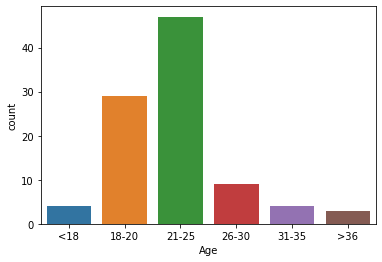

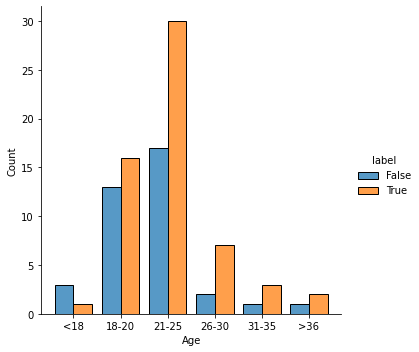

In [103]:
raw_data['Age'] = pd.Categorical(raw_data['Age'],
                                   categories= ["<18", "18-20", "21-25", "26-30", "31-35", ">36"],
                                   ordered=True)

sns.countplot(x="Age", data=raw_data)
sns.displot(raw_data, x= "Age", hue= "label", multiple="dodge", discrete=True, shrink=0.8)

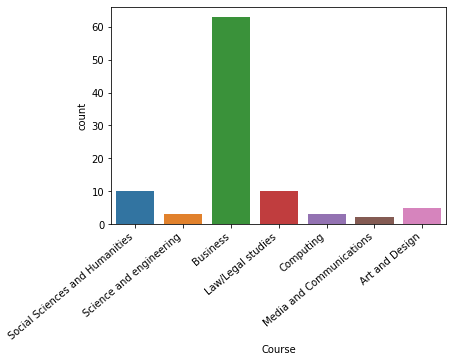

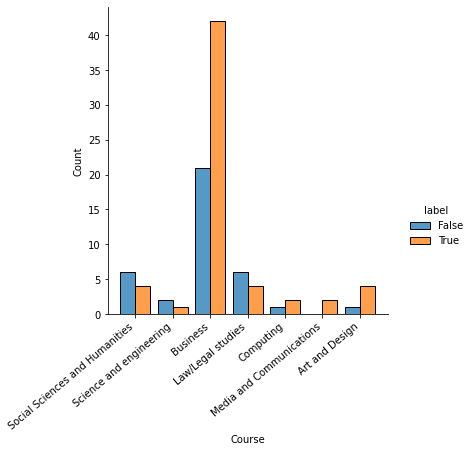

In [104]:
ax = sns.countplot(x="Course", data=raw_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

bx = sns.displot(raw_data, x= "Course", hue= "label", multiple="dodge", discrete=True, shrink=0.8)
bx.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

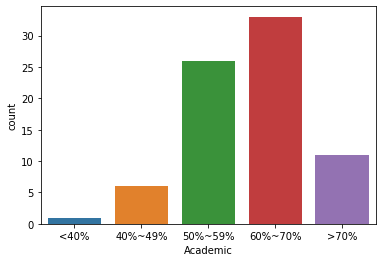

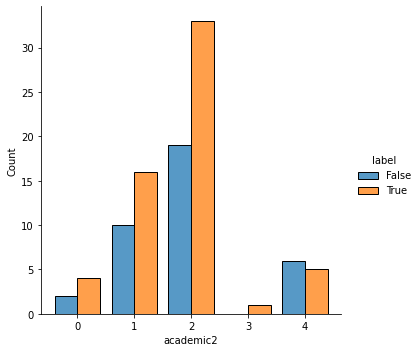

In [105]:
raw_data['Academic'] = pd.Categorical(raw_data['Academic'],
                                   categories= ['<40%', '40%~49%', '50%~59%', '60%~70%','>70%'],
                                   ordered=True)

sns.countplot(x="Academic", data=raw_data)

imp = SimpleImputer(strategy= 'most_frequent')
raw_data['academic1'] = imp.fit_transform(raw_data[['Academic']])

ordin = OrdinalEncoder()
raw_data['academic2'] = ordin.fit_transform(raw_data[['academic1']])

sns.displot(raw_data, x= "academic2", hue = "label", multiple="dodge", discrete=True, shrink=0.8)

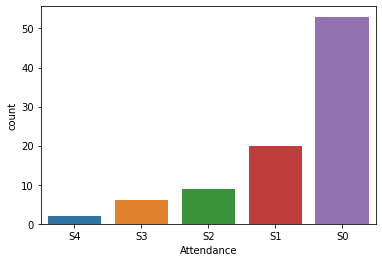

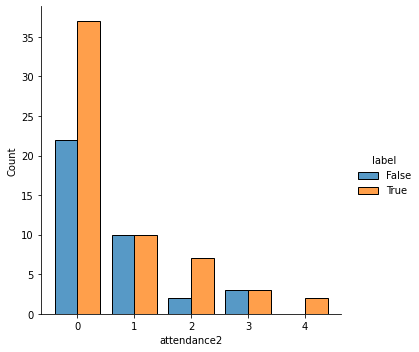

In [113]:
raw_data['Attendance'] = pd.Categorical(raw_data['Attendance'],
                                   categories= ['S4', 'S3','S2','S1', 'S0'],
                                   ordered=True)
sns.countplot(x="Attendance", data=raw_data)


imp = SimpleImputer(strategy= 'most_frequent')
raw_data['attendance1'] = imp.fit_transform(raw_data[['Attendance']])

ordin = OrdinalEncoder()
raw_data['attendance2'] = ordin.fit_transform(raw_data[['attendance1']])

sns.displot(raw_data, x= "attendance2", hue = "label", multiple="dodge", discrete=True, shrink=0.8)